# Predict engine Rating

### Importing libraries

In [2]:
import pandas as pd              # VERSION  1.0.5
import numpy as np               # VERSION  1.18.5 
import matplotlib.pyplot as plt  # VERSION  3.2.2
import seaborn as sns            # VERSION  0.10.1
from scipy.stats import norm     # VERSION  1.5.0

from imblearn.pipeline import make_pipeline             # VERSION  0.7.0
from imblearn.over_sampling import RandomOverSampler

from sklearn.model_selection import train_test_split   # VERSION  0.23.1
from sklearn.preprocessing import OneHotEncoder 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import make_column_transformer

import warnings
warnings.filterwarnings('ignore')

from joblib import dump      # VERSION  0.16.0

In [3]:
data = pd.read_excel('data.xlsx', 'data')
print('Shape of the data:', data.shape)

data1 = data.copy() # saving the copy of the original data

Shape of the data: (26307, 73)


In [4]:
data.head()

,appointmentId,inspectionStartTime,year,month,engineTransmission_battery_value,engineTransmission_battery_cc_value_0,engineTransmission_battery_cc_value_1,engineTransmission_battery_cc_value_2,engineTransmission_battery_cc_value_3,engineTransmission_battery_cc_value_4,...,engineTransmission_gearShifting_cc_value_1,engineTransmission_gearShifting_cc_value_2,engineTransmission_comments_value_0,engineTransmission_comments_value_1,engineTransmission_comments_value_2,engineTransmission_comments_value_3,engineTransmission_comments_value_4,fuel_type,odometer_reading,rating_engineTransmission
0,aj_01,2019-02-03 15:43:48,2008,8,No,Weak,NaN,NaN,NaN,NaN,...,NaN,NaN,Pickup Low,Starter Motor / Solenoid malfunctioning,NaN,NaN,NaN,Petrol + CNG,124600,3.0
1,aj_02,2019-01-16 13:02:12,2007,5,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Petrol + CNG,78108,4.0
2,aj_03,2019-02-09 13:31:04,2012,5,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Diesel,93348,3.5
3,aj_04,2019-01-18 11:02:53,2013,1,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Petrol + CNG,48233,3.5
4,aj_05,2019-01-27 12:12:06,2011,7,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Petrol + CNG,74368,4.0


In [5]:
data.tail()

,appointmentId,inspectionStartTime,year,month,engineTransmission_battery_value,engineTransmission_battery_cc_value_0,engineTransmission_battery_cc_value_1,engineTransmission_battery_cc_value_2,engineTransmission_battery_cc_value_3,engineTransmission_battery_cc_value_4,...,engineTransmission_gearShifting_cc_value_1,engineTransmission_gearShifting_cc_value_2,engineTransmission_comments_value_0,engineTransmission_comments_value_1,engineTransmission_comments_value_2,engineTransmission_comments_value_3,engineTransmission_comments_value_4,fuel_type,odometer_reading,rating_engineTransmission
26302,aj_26303,2019-03-10 13:08:03,2013,3,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Electrical wiring Damaged,NaN,NaN,NaN,NaN,Petrol + CNG,64532,4.0
26303,aj_26304,2019-04-12 13:59:02,2007,8,No,Weak,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Petrol,88051,4.0
26304,aj_26305,2019-02-28 10:42:53,2004,7,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Petrol,22656,3.5
26305,aj_26306,2019-04-02 12:21:19,2010,12,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Diesel,126015,4.5
26306,aj_26307,2019-04-06 13:09:51,2015,11,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Petrol,23983,4.5


appointmentId is just a serial number given to the data

In [6]:
data = data.drop(columns = 'appointmentId')

The rating of an engine does not depend on the time of inspection, hence we can drop it

In [7]:
data = data.drop(columns = 'inspectionStartTime')

In [8]:
data.describe()

,year,month,engineTransmission_engineOil_cc_value_9,engineTransmission_engine_cc_value_10,odometer_reading,rating_engineTransmission
count,26307.000000,26307.000000,0.0,0.0,26307.000000,26307.000000
mean,2010.856578,5.462006,NaN,NaN,76460.143764,3.624663
std,3.766234,3.583866,NaN,NaN,46762.524489,0.847645
min,1989.000000,1.000000,NaN,NaN,1.000000,0.500000
25%,2008.000000,2.000000,NaN,NaN,46396.000000,3.500000
50%,2011.000000,5.000000,NaN,NaN,72013.000000,4.000000
75%,2014.000000,9.000000,NaN,NaN,98289.500000,4.000000
max,2019.000000,12.000000,NaN,NaN,999999.000000,5.000000


In [9]:
data.select_dtypes(exclude = 'object')

,year,month,engineTransmission_engineOil_cc_value_9,engineTransmission_engine_cc_value_10,odometer_reading,rating_engineTransmission
0,2008,8,NaN,NaN,124600,3.0
1,2007,5,NaN,NaN,78108,4.0
2,2012,5,NaN,NaN,93348,3.5
3,2013,1,NaN,NaN,48233,3.5
4,2011,7,NaN,NaN,74368,4.0
...,...,...,...,...,...,...
26302,2013,3,NaN,NaN,64532,4.0
26303,2007,8,NaN,NaN,88051,4.0
26304,2004,7,NaN,NaN,22656,3.5
26305,2010,12,NaN,NaN,126015,4.5


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26307 entries, 0 to 26306
Data columns (total 71 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   year                                                       26307 non-null  int64  
 1   month                                                      26307 non-null  int64  
 2   engineTransmission_battery_value                           26307 non-null  object 
 3   engineTransmission_battery_cc_value_0                      3438 non-null   object 
 4   engineTransmission_battery_cc_value_1                      430 non-null    object 
 5   engineTransmission_battery_cc_value_2                      72 non-null     object 
 6   engineTransmission_battery_cc_value_3                      16 non-null     object 
 7   engineTransmission_battery_cc_value_4                      4 non-null      object 
 8   engine

### Handling Null Values

In [11]:
# filtering the list of columns with null values
[col for col in data.columns if data[col].isna().any()]

['engineTransmission_battery_cc_value_0',
 'engineTransmission_battery_cc_value_1',
 'engineTransmission_battery_cc_value_2',
 'engineTransmission_battery_cc_value_3',
 'engineTransmission_battery_cc_value_4',
 'engineTransmission_engineOilLevelDipstick_cc_value_0',
 'engineTransmission_engineOil_cc_value_0',
 'engineTransmission_engineOil_cc_value_1',
 'engineTransmission_engineOil_cc_value_2',
 'engineTransmission_engineOil_cc_value_3',
 'engineTransmission_engineOil_cc_value_4',
 'engineTransmission_engineOil_cc_value_5',
 'engineTransmission_engineOil_cc_value_6',
 'engineTransmission_engineOil_cc_value_7',
 'engineTransmission_engineOil_cc_value_8',
 'engineTransmission_engineOil_cc_value_9',
 'engineTransmission_engine_cc_value_0',
 'engineTransmission_engine_cc_value_1',
 'engineTransmission_engine_cc_value_2',
 'engineTransmission_engine_cc_value_3',
 'engineTransmission_engine_cc_value_4',
 'engineTransmission_engine_cc_value_5',
 'engineTransmission_engine_cc_value_6',
 'engi

The above are the columns in the data with the null values,        

All these columns(except for columns related to comments) have the description "current condition if not yes"  

These columns are having null values because their condition is "yes"(in good condition) i.e.. all the null values can be filled with "yes"

for thr columns related to comments, null values occured in them as there were no condition to report, null values in these columns can be filled with "yes" or "good"

In [12]:
data = data.fillna('Yes')

In [13]:
# verifying if any columns have null values

[col for col in data.columns if data[col].isna().any()]

[]

All the null values in the data have been imputed

Converting the rating_engineTransmission into "Worse" ,'Average',"Good"

In [14]:
def f(r):
    if r <= 2:
        return 'Worse'
    elif r<=3:
        return 'Average'
    else:
        return 'Good'
    
data.rating_engineTransmission = data.rating_engineTransmission.map(f)

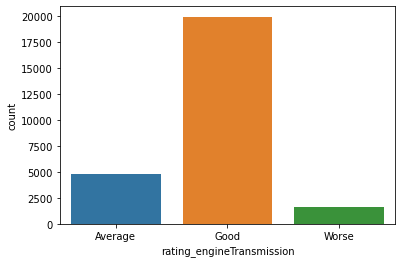

In [25]:
sns.countplot(data['rating_engineTransmission'])

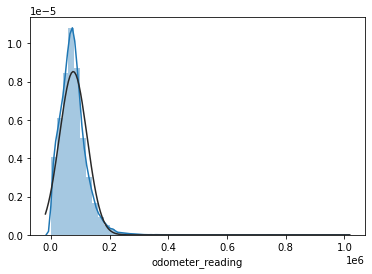

In [15]:
sns.distplot(data['odometer_reading'],fit = norm)

The distribution of the only numeric feature is not very differnt from normal , it can be left as it is

### Handling Outliers

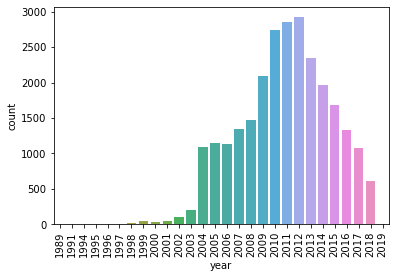

In [16]:
sns.countplot(data['year']);
plt.xticks(rotation = 90);

There is a possibility that years below 1996 are outliers

In [20]:
data = data[data['year'] > 1997]
print('Shape of data after Outlier removal:', data.shape)

Shape of data after Outlier removal: (26288, 71)


year and month columns if exists in numerical data type the algorithsm might treat them just as some number, they have to be converted into categotical

In [21]:
data['year'] = data.year.astype(str)
data['month'] = data.month.astype(str)

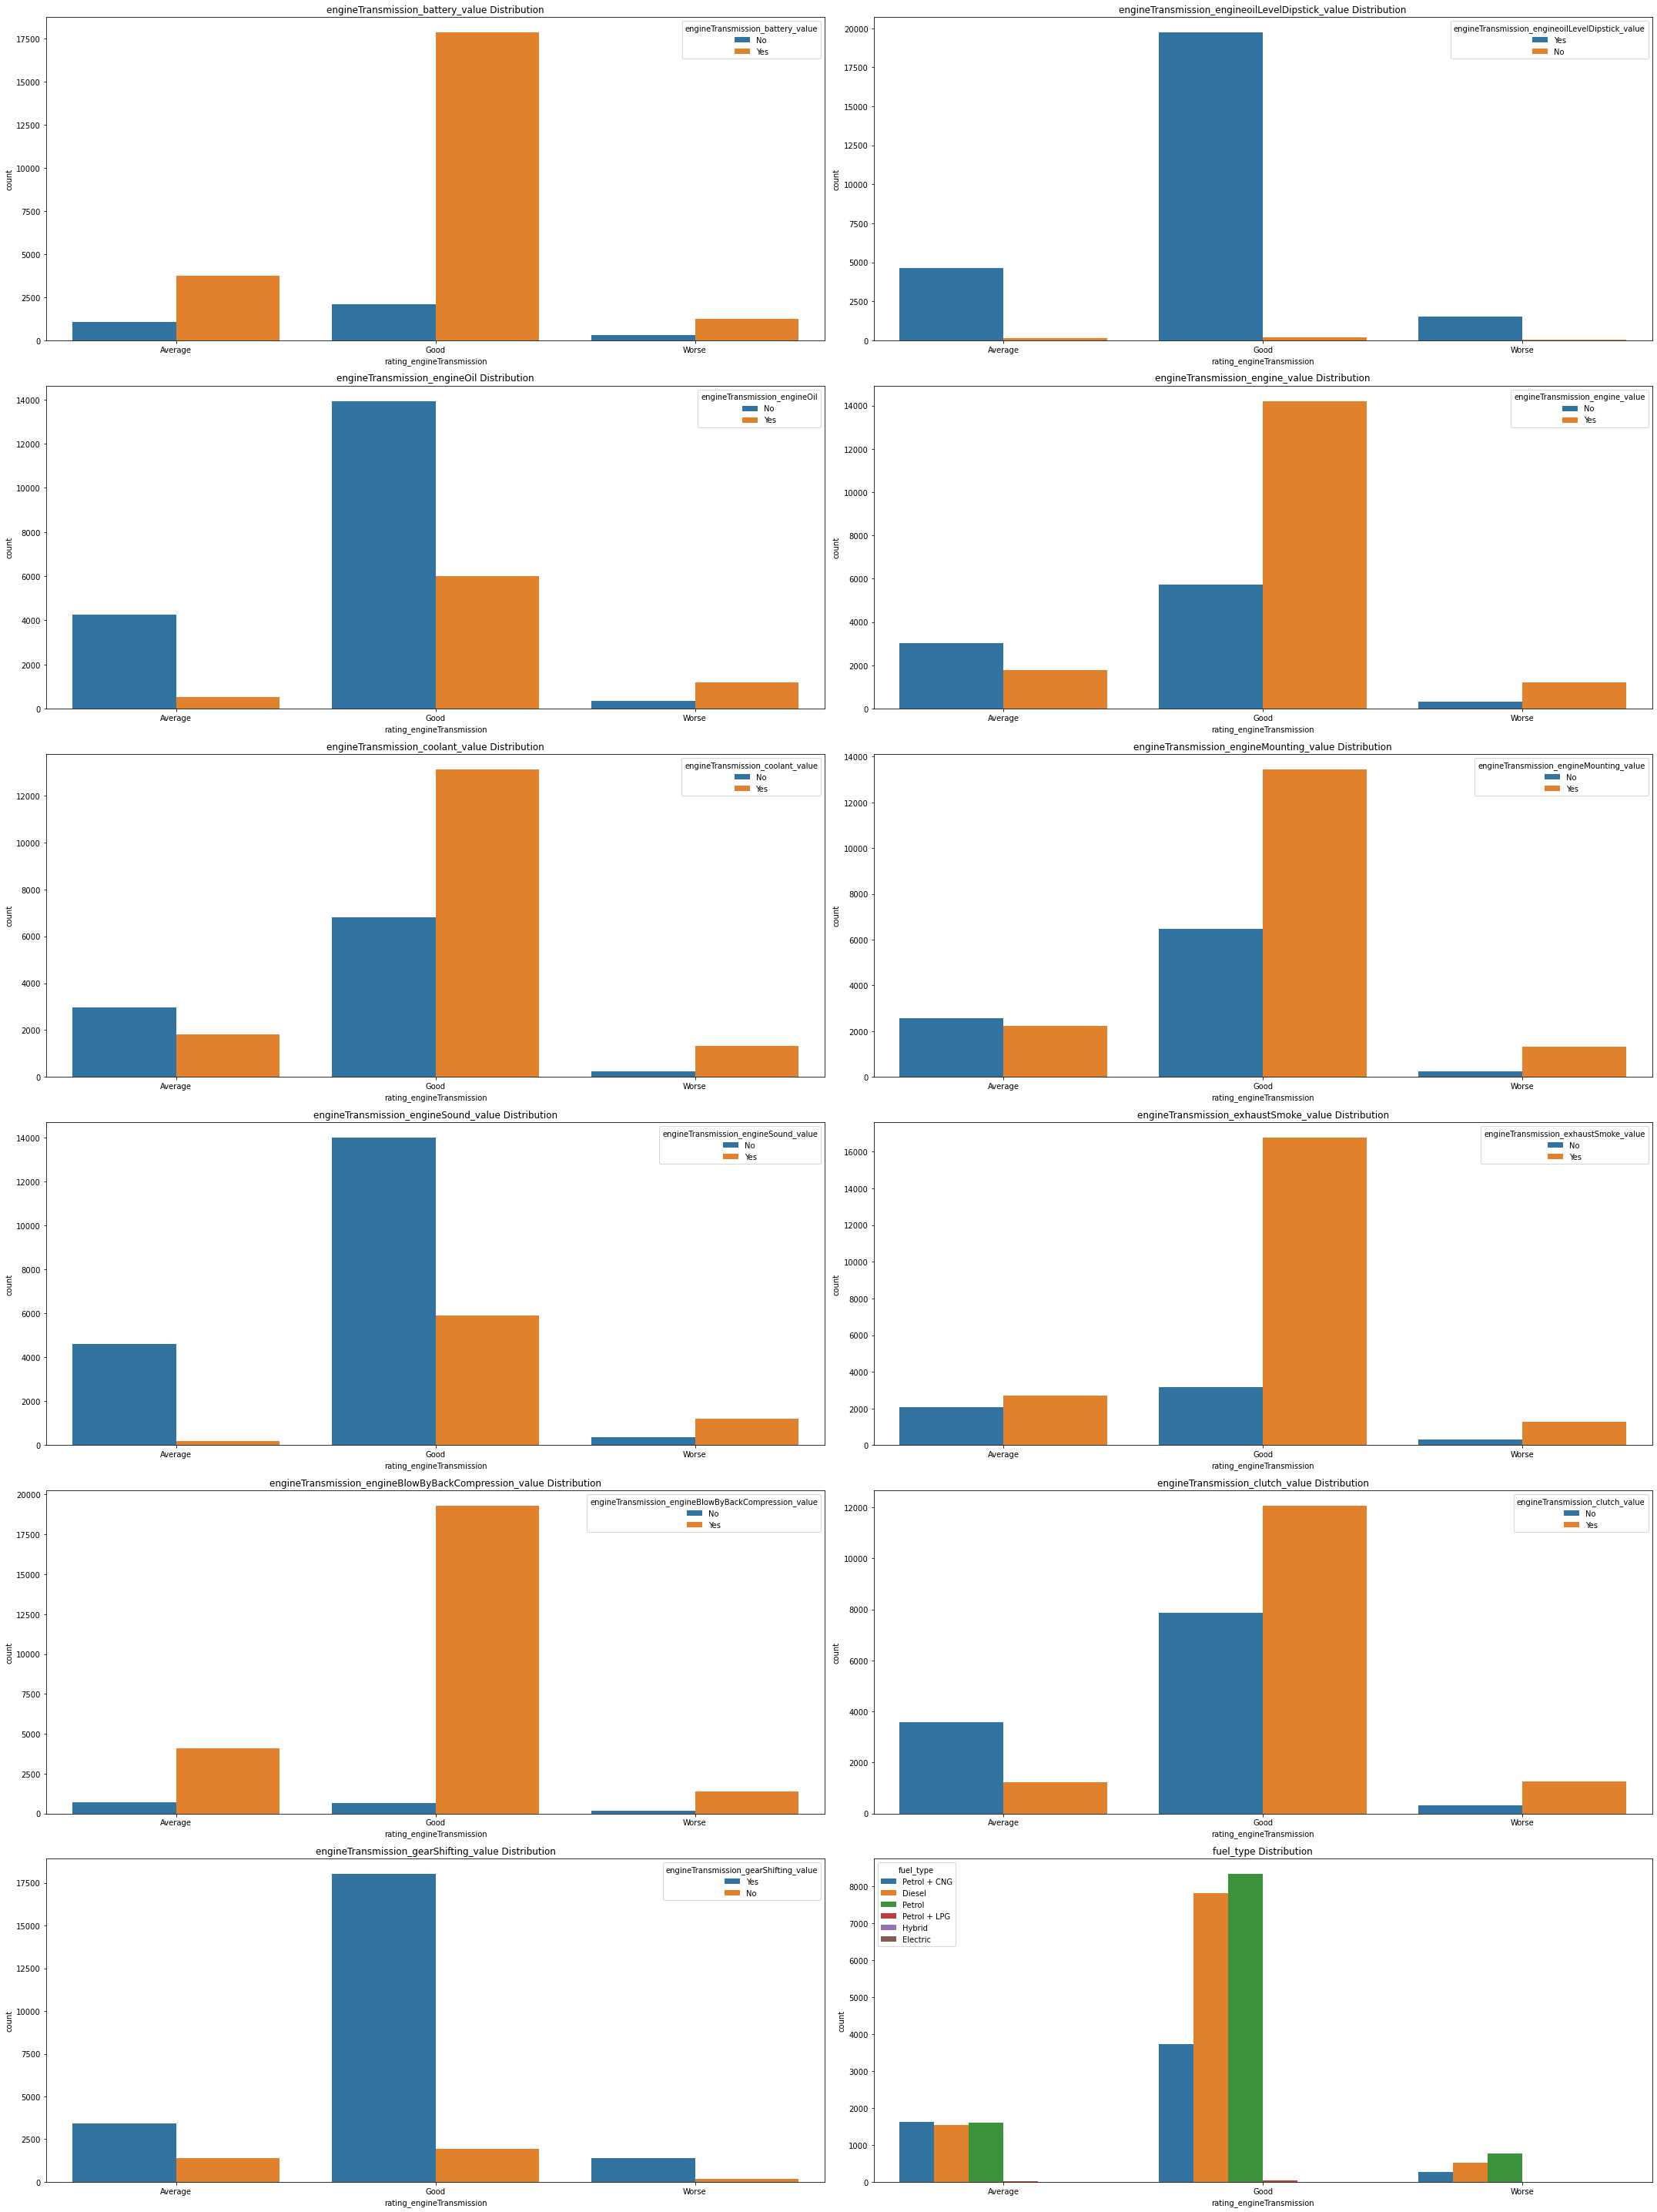

In [22]:
summed_cols = ['engineTransmission_battery_value','engineTransmission_engineoilLevelDipstick_value',
               'engineTransmission_engineOil','engineTransmission_engine_value','engineTransmission_coolant_value',
              'engineTransmission_engineMounting_value','engineTransmission_engineSound_value',
               'engineTransmission_exhaustSmoke_value','engineTransmission_engineBlowByBackCompression_value',
              'engineTransmission_clutch_value','engineTransmission_gearShifting_value','fuel_type']

fig = plt.figure(figsize = (30,40))
for i, feature in enumerate(summed_cols):
    ax = fig.add_subplot(6,2,i+1)
    sns.countplot(data['rating_engineTransmission'], hue=data[feature])
    ax.set_title(feature+' Distribution')
    
fig.tight_layout()
plt.show()


The above plot shows the distribution of summarized features with respect to the target

Spliting the data into features, target

In [23]:
X = data.drop(columns = 'rating_engineTransmission')
Y = data['rating_engineTransmission']

Spliting the data into train and test

In [24]:
trainX, testX, trainY, testY = train_test_split(X,Y)

Separating numerical and categorical columns in the data

In [25]:
cat_data = X.select_dtypes(include = 'object')
int_data = X.select_dtypes(exclude = 'object')

Building individual pipelies for numercial and categorical columns and combining them using column transformer

Scaling numerical values using StandardScalar

Encoding categorical columns using OneHotEncoder

In [28]:
int_pipeline = make_pipeline(StandardScaler())
cat_pipeline = make_pipeline(OneHotEncoder(handle_unknown= 'ignore'))


preprocessor = make_column_transformer((cat_pipeline,cat_data.columns),
                                      (int_pipeline,int_data.columns),
                                      remainder = 'passthrough')

Writing a funcition to Analysing the performance of different machine learning algorithms.

The function outputs:
    * training accuracy
    * testing accuracy
    * confusion matrix
    * classification report

In [26]:
### Function for analyisng the model performance

def model_performance(model):
    pl = make_pipeline(preprocessor, RandomOverSampler(), model)
    pl.fit(trainX,trainY)
    
    print('Training Accuracy :',np.round(pl.score(trainX,trainY),2))
    print('Testing Accuracy :',np.round(pl.score(testX,testY),2))
    y_pred = pl.predict(testX)
    con_mat = pd.DataFrame(confusion_matrix(y_pred = y_pred, y_true = testY))
            

    print('\nCLASSIFICATION REPORT\n')
    print(classification_report(y_pred = y_pred, y_true = testY))

    print('\nCONFUSION MATRIX')
    plt.figure(figsize= (6,4))
    sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu");


### Decision Tree Model

Training Accuracy : 1.0
Testing Accuracy : 0.76

CLASSIFICATION REPORT

              precision    recall  f1-score   support

     Average       0.38      0.39      0.39      1195
        Good       0.85      0.84      0.85      4977
       Worse       0.84      0.82      0.83       400

    accuracy                           0.76      6572
   macro avg       0.69      0.69      0.69      6572
weighted avg       0.76      0.76      0.76      6572


CONFUSION MATRIX


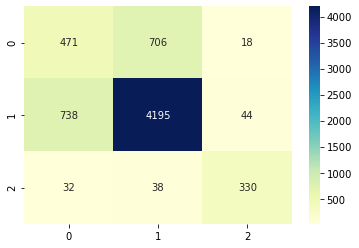

In [29]:
model_performance(DecisionTreeClassifier())

The Decisin Tree Model is over fitting 

## KNN

Training Accuracy : 0.85
Testing Accuracy : 0.73

CLASSIFICATION REPORT

              precision    recall  f1-score   support

     Average       0.38      0.62      0.48      1195
        Good       0.90      0.75      0.81      4977
       Worse       0.67      0.82      0.74       400

    accuracy                           0.73      6572
   macro avg       0.65      0.73      0.68      6572
weighted avg       0.79      0.73      0.75      6572


CONFUSION MATRIX


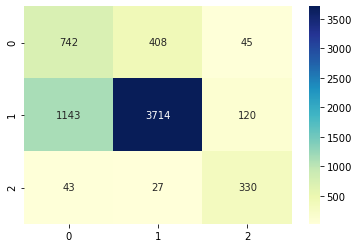

In [30]:
model_performance(KNeighborsClassifier())

KNN model is also over fitting

### Logistic Regression 

Training Accuracy : 0.75
Testing Accuracy : 0.74

CLASSIFICATION REPORT

              precision    recall  f1-score   support

     Average       0.40      0.71      0.51      1195
        Good       0.93      0.73      0.82      4977
       Worse       0.68      0.91      0.78       400

    accuracy                           0.74      6572
   macro avg       0.67      0.78      0.70      6572
weighted avg       0.81      0.74      0.76      6572


CONFUSION MATRIX


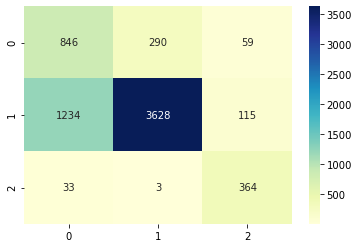

In [32]:
model_performance(LogisticRegression())

Logistic regression seems to be better than other algorithms

In [34]:
model = make_pipeline(preprocessor, RandomOverSampler(), LogisticRegression())
model.fit(trainX,trainY)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['year', 'month', 'engineTransmission_battery_value',
       'engineTransmission_battery_cc_value_0',
       'engineTransmission_battery_cc_value_1',
       'engineTransmission_battery_cc_...
       'engineTransmission_comments_value_1',
       'engineTransmission_comments_value_2',
       'engineTransmission_comments_value_3',
       'engineTransmission_comments_value_4', 'fuel_type'],
      dtype='object')),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('standardscaler',
                         

In [39]:
dump(model, filename='model.joblib')

['model.joblib']

Q1. Briefly describe your approach to this problem and the steps you took?        
A1. * Handling Null Values
    * Deleting Obviously unwanted columns
    * Explratory Data Visualization
    * Handling Outliers
    * Changing the data types of the columns as per requirement
    * Spliting the data into train and test
    * building individual pipelines for preprocessing numerical and categorical columns
    	Numerical pipeline does Scaling
    	Catergorical pipelin does Encoding
    	Combing the above two pipelines using column transformer
    * Writing a function for analysing model performance:
    	Function inludes :
    		Column transformer as preprocessor
    		RandomOverSampler for balancing imbalaned classes
    		A Machine Learning algorithm
    * Trying different Machine Learning algorithms and comparing their performaces
    
    
Q.2.a How well does your model work?       
A.2.a My model performance is not bad it works good.

Q.2.b How do you know for sure that’s how well it works?         
A.2.b My model has an accuracy of 74% without overfitting.

Q.2.c What stats did you use to prove its predictive performance and why?              
A.2.c I used Accuracy, Confusion Matrix since this is a classification problem.

Q.2.d What issues did you encounter?            
A.2.d Lot of null values, Difficult to identify outliers, Having float values for in the target column for the classification problem, Limited Time. 

Q.2.e What insights did you obtain from this data? For example: What features are important? Why? What visualizations help you understand the data?          
A.2.e The distplot helped me to findout that odometer_reading is near to normal distribution.         
      A barplot to show target values are imbalanced.        
      A bargraph on "year" column to deal with outliers. 
      
      
      
Q.3.a What other data (if any) would have been useful?             
A.3.a I felt that the description the data can be much more informative.

Q.3.b What are some other things you would have done if you had more time?         
A.3.b   * More Exploratory Data Analysis.         
	* Various Feature Selection Methods.      
	* Dimentinality reduction.       
	* Try more complex models.         
	* Try Deep learning for better results.     

